In [3]:
import numpy as np #수치 연산 라이브러리
import pandas as pd #데이터 처리 분석 라이브러리
import matplotlib.pyplot as plt #데이터 시각화 라이브러리
import seaborn as sns #통계 데이터 시각화 라이브러리

plt.style.use('seaborn') #seaborn 스타일 적용
sns.set(font_scale=2.5)
!pip install missingno #느낌표(!)는 한 줄씩 순차적으로 실행하라는 의미. pip 명령어가 여러개일 때는 느낌표 사용하자.
import missingno as msno #결측데이터 파악 패키지
import warnings #경고 제어 패키지
warnings.filterwarnings('ignore') #경고 무시

%matplotlib inline #Jupiter notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌

ERROR: Invalid requirement: '#느낌표(!)는'
UsageError: unrecognized arguments: #Jupiter notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해줌


In [5]:
#1. Dataset 확인
df_train = pd.read_csv('../study/train.csv')
df_test = pd.read_csv('../study/test.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [60]:
#1.1 Null data check
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum()/df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [61]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum()/df_test[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


In [37]:
df_train[col] 

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [39]:
df_train[col].isnull().sum()

2

In [158]:
df_train[col]

(891,)

<AxesSubplot:>

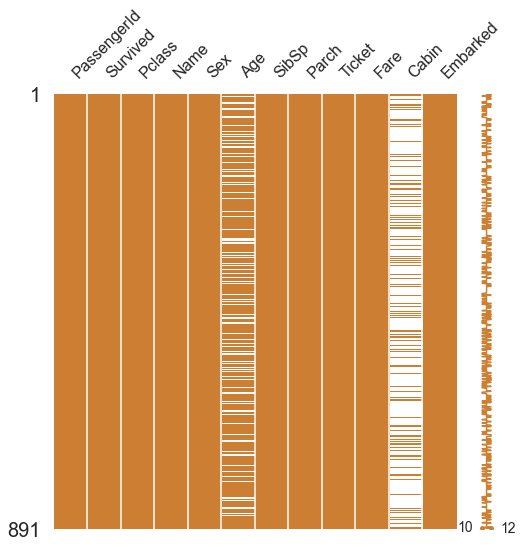

In [68]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

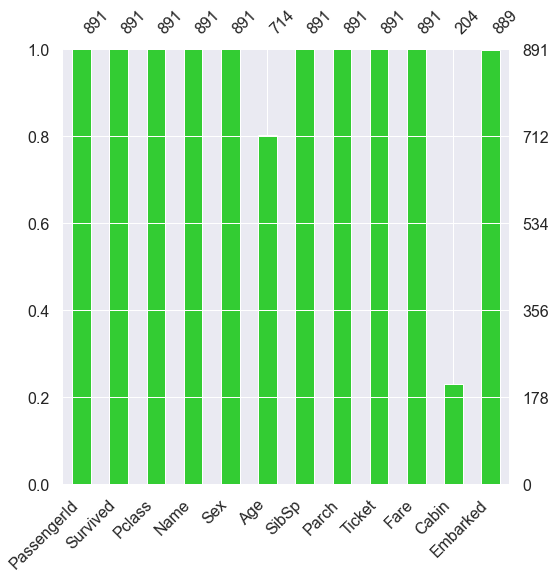

In [69]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color=(0.2, 0.8, 0.2))

<AxesSubplot:>

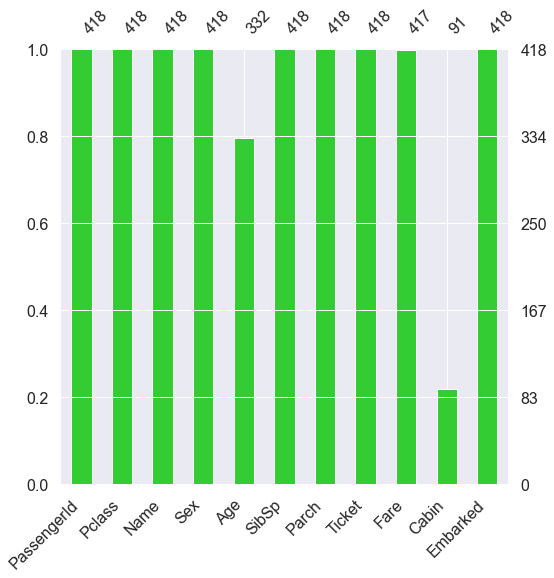

In [70]:
msno.bar(df=df_test.iloc[:,:], figsize=(8,8), color=(0.2, 0.8, 0.2))

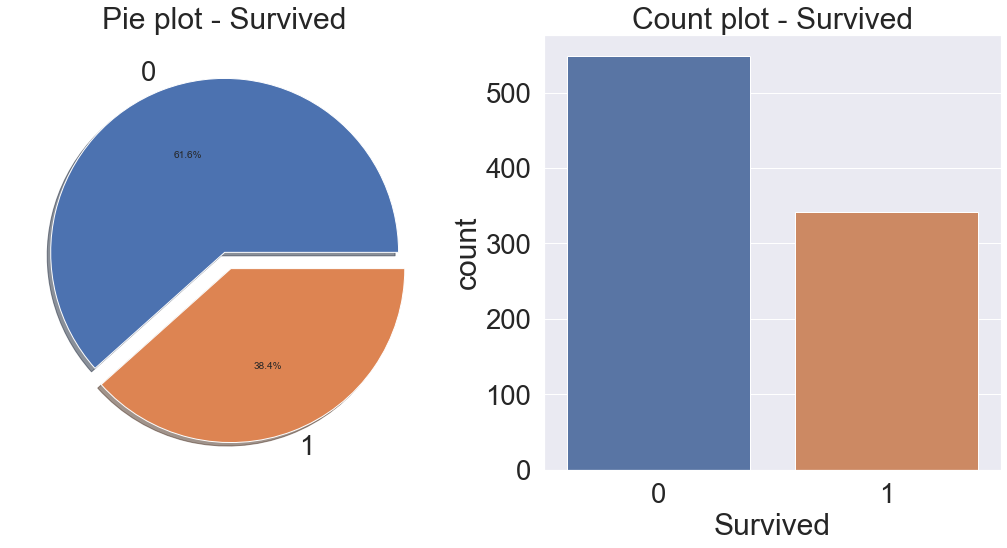

In [111]:
#1.2 Target label 확인
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()
#결론: target label('Survived')이 balanced 되어있다. 편향되지 않았다.

In [117]:
#2. Exploratory data analysis
#2.1 Pclass
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()

,Survived
Pclass,
1,216
2,184
3,491


In [120]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()

,Survived
Pclass,
1,136
2,87
3,119


In [123]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

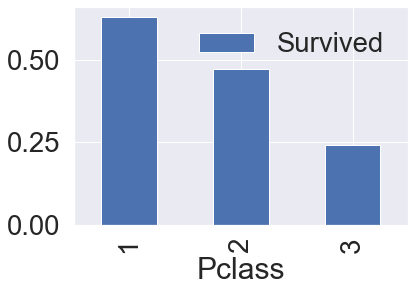

In [126]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

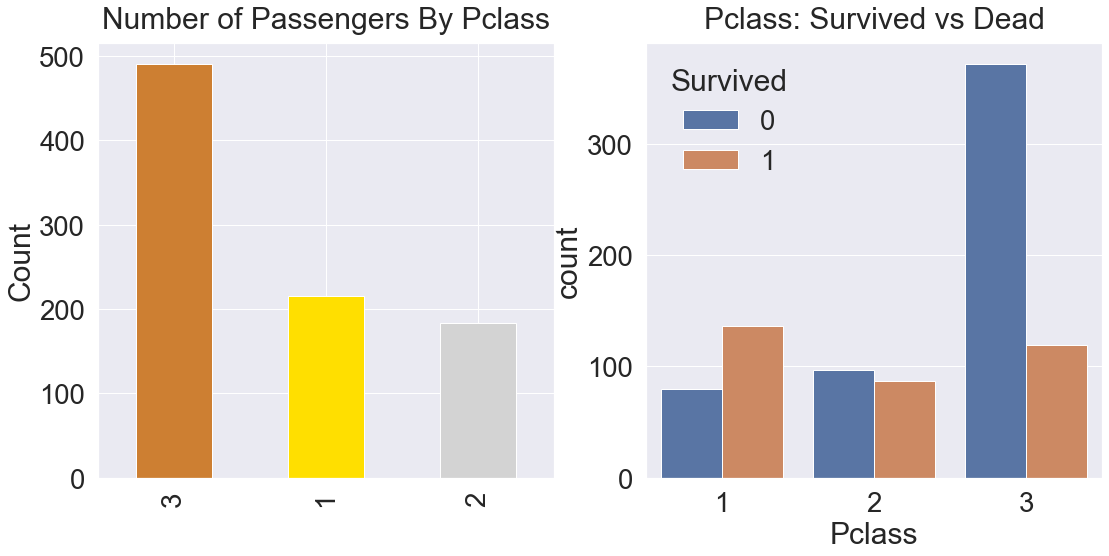

In [134]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32', '#FFDF00', '#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

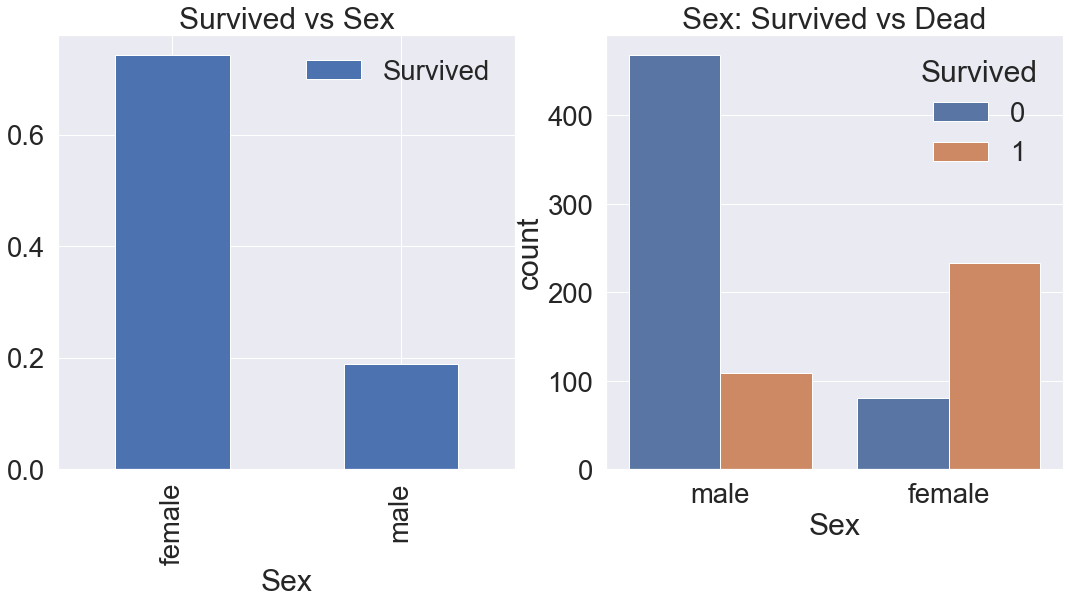

In [140]:
#2.2 Sex
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [142]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [143]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


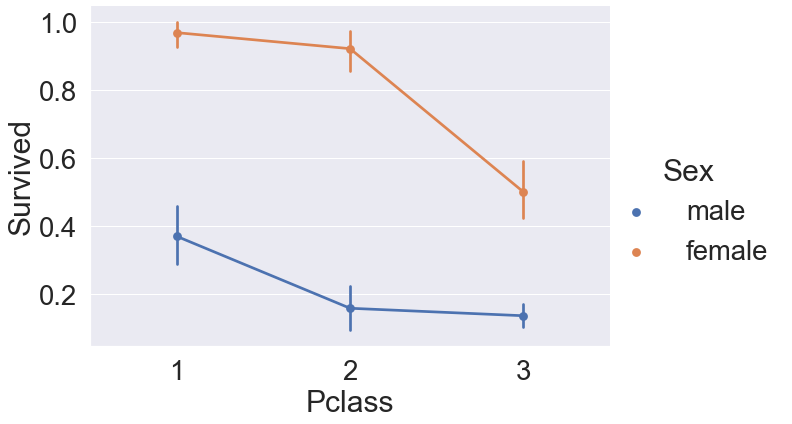

In [144]:
#2.3 Both Sex and Pclass
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size =6, aspect = 1.5)

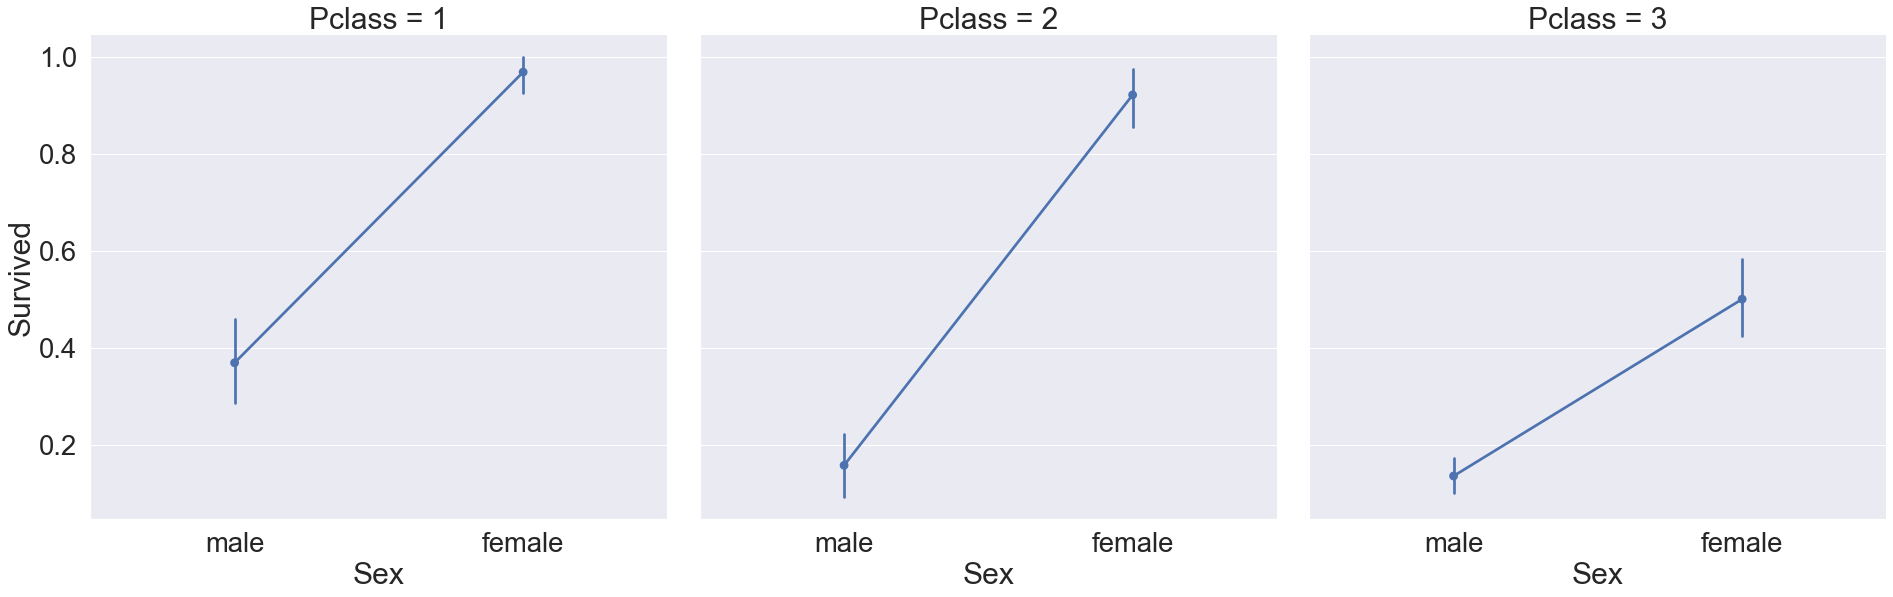

In [7]:
sns.factorplot('Sex', 'Survived', col='Pclass', data=df_train, saturation=.5, size=9, aspect=1)

In [8]:
#2.4 Age

print('제일 나이 많은 탑승객: {:.1f} Years'.format(df_train['Age'].max()))
print('제일 어린 탑승객: {:.1f} Years'.format(df_train['Age'].min()))
print('탑승객 평균 나이: {:.1f} Years'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객: 80.0 Years
제일 어린 탑승객: 0.4 Years
탑승객 평균 나이: 29.7 Years


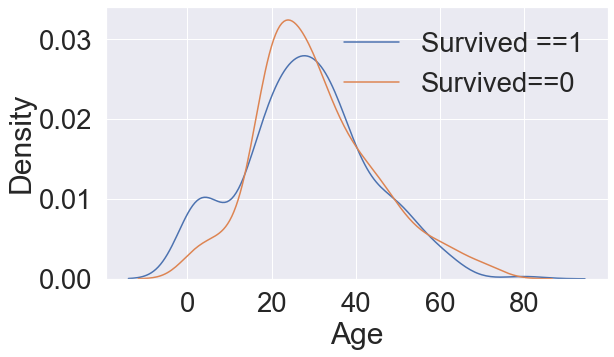

In [38]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived ==1','Survived==0'])
plt.show()

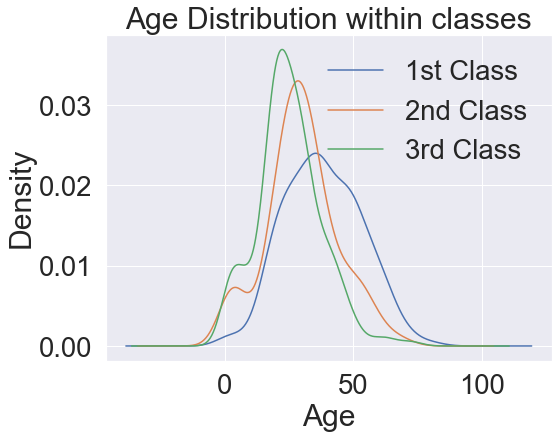

In [41]:
plt.figure(figsize=(8,6))
df_train[df_train['Pclass']==1]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==2]['Age'].plot(kind='kde')
df_train[df_train['Pclass']==3]['Age'].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

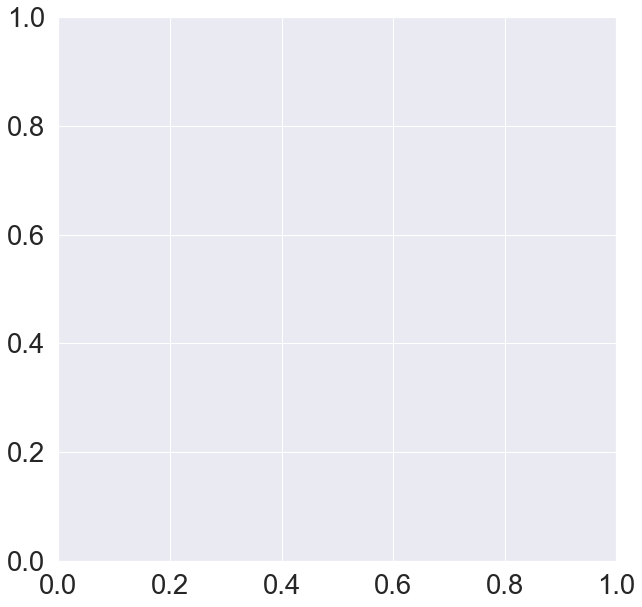

<Figure size 720x720 with 0 Axes>

In [22]:
#도화지를 준비하는 2가지 방법

f, ax = plt.subplots(1, 1, figsize=(10,10))
f = plt.figure(figsize=(10,10))

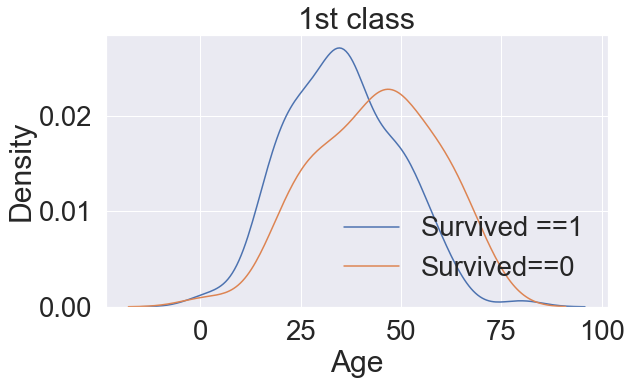

In [48]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==1)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==1)]['Age'], ax=ax)
plt.legend(['Survived ==1','Survived==0'])
plt.title('1st class')
plt.show()

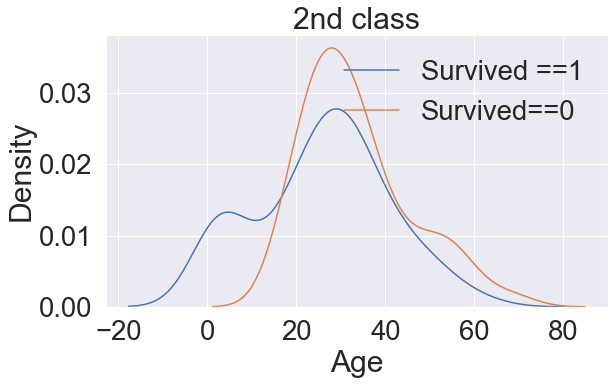

In [49]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==2)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==2)]['Age'], ax=ax)
plt.legend(['Survived ==1','Survived==0'])
plt.title('2nd class')
plt.show()

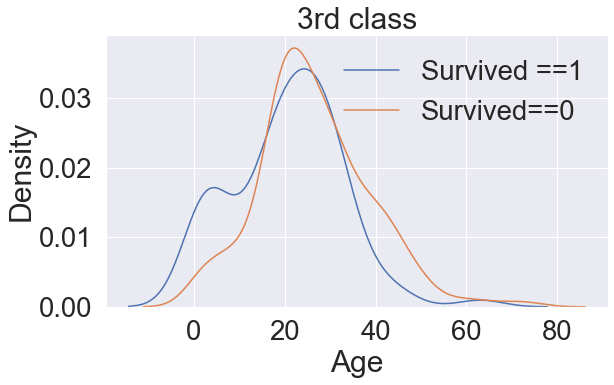

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(9,5))
sns.kdeplot(df_train[(df_train['Survived']==1)&(df_train['Pclass']==3)]['Age'], ax=ax)
sns.kdeplot(df_train[(df_train['Survived']==0)&(df_train['Pclass']==3)]['Age'], ax=ax)
plt.legend(['Survived ==1','Survived==0'])
plt.title('3rd class')
plt.show()

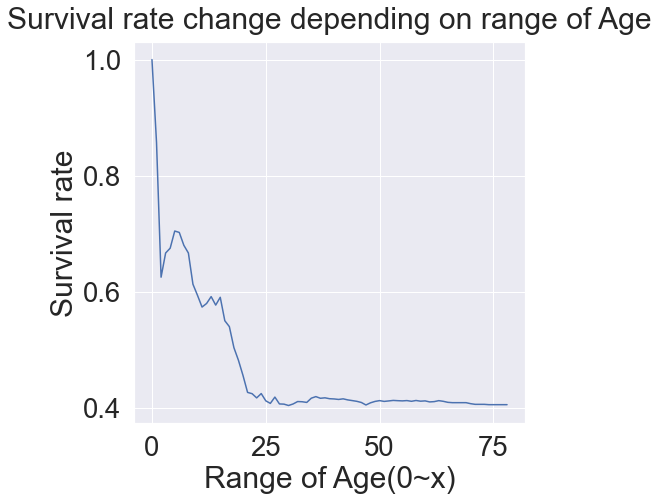

In [71]:
cumulative_survival_ratio = []
for i in range(1, 80):
    cumulative_survival_ratio.append(df_train[df_train['Age']<i]['Survived'].sum() / len(df_train[df_train['Age']<i]['Survived']))

plt.figure(figsize=(7,7))
plt.plot(cumulative_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()

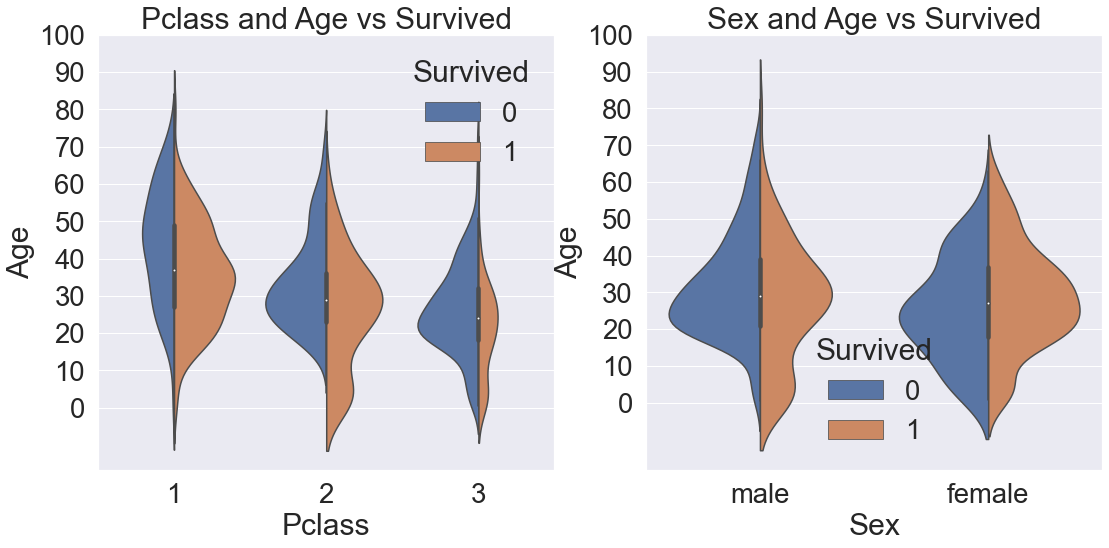

In [73]:
#2.5 Pclass, Sex, Age
f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex", "Age", hue="Survived", data=df_train, sale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

<AxesSubplot:xlabel='Embarked'>

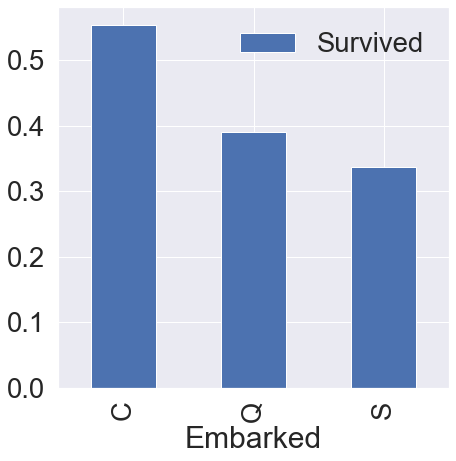

In [113]:
#2.6 Embarked
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

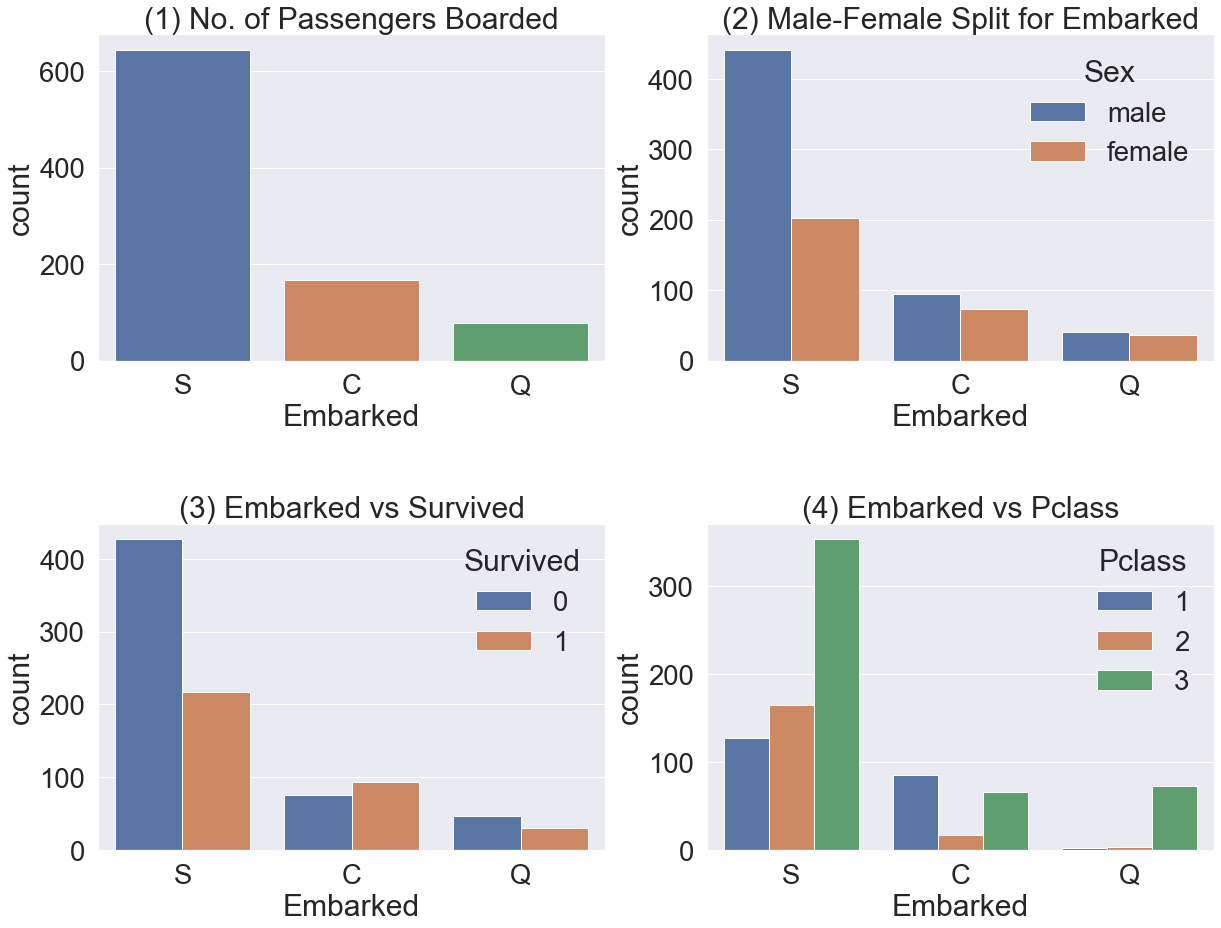

In [117]:
f, ax= plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')
sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')
sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')
sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [131]:
#2.7 Family - SibSp(형제자매)+Parch(부모자녀)+1(자신)
df_train['FamilySize'] =  df_train['SibSp']+ df_train['Parch'] +1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch']+1

In [126]:
print("Maximum size of Family: ", df_train['FamilySize'].max())
print("Minimum size of Family: ", df_train['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


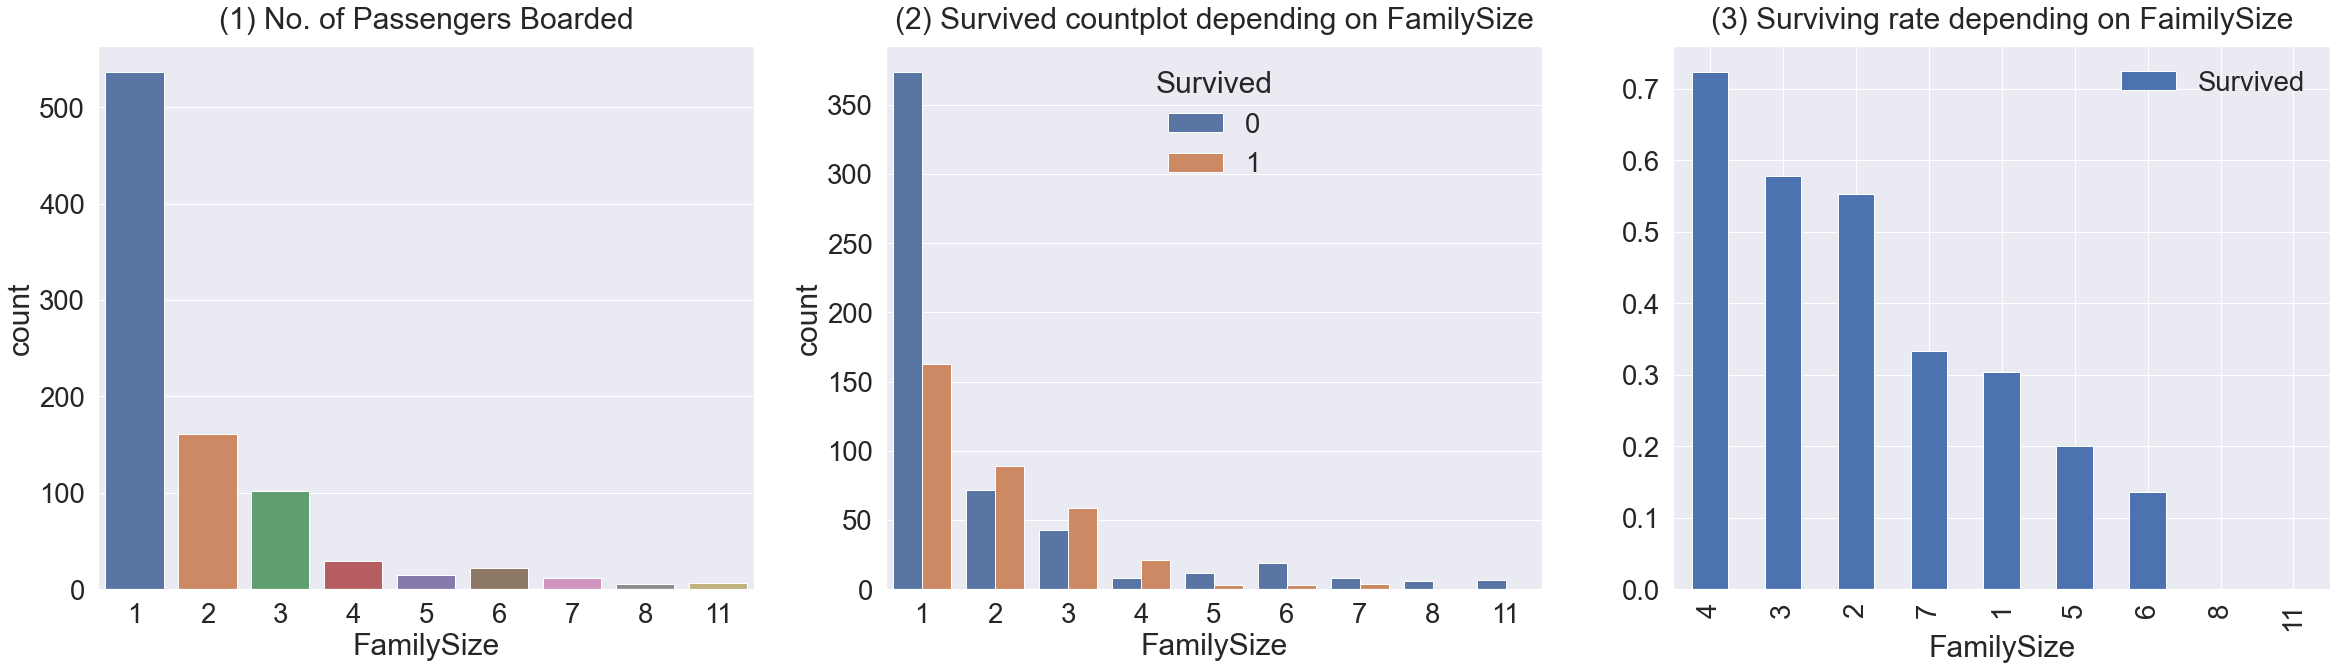

In [129]:
f, ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('(1) No. of Passengers Boarded', y=1.02)
sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Surviving rate depending on FaimilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

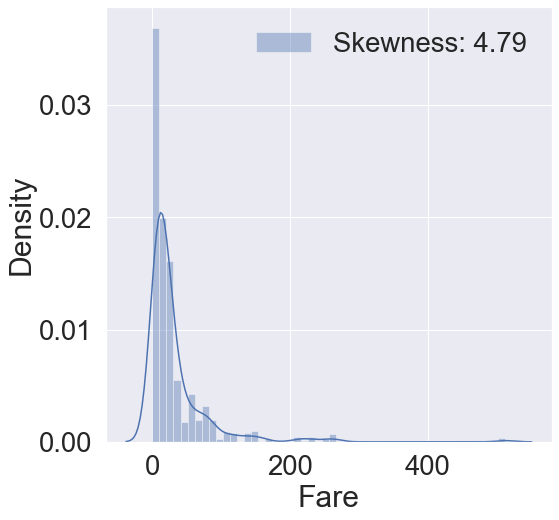

In [137]:
fig, ax = plt.subplots(1,1, figsize= (8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
#disfplot은 Series의 histogram을 그려줌 #Skewness = 왜도 =0이면 정규분포, >0이면 좌측(<0이면 우측)으로 치우침
g = g.legend(loc='best')
#legend를 최적의 위치에 배치

In [142]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean()
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0)
df_test['Fare'] = df_test['Fare'].map(lambda i:np.log(i) if i>0 else 0 )
# 특정 Series에 동일한 함수를 쓰고 싶다면 map(간단한 람다함수나 딕셔너리)과 apply(함수)를 사용한다.

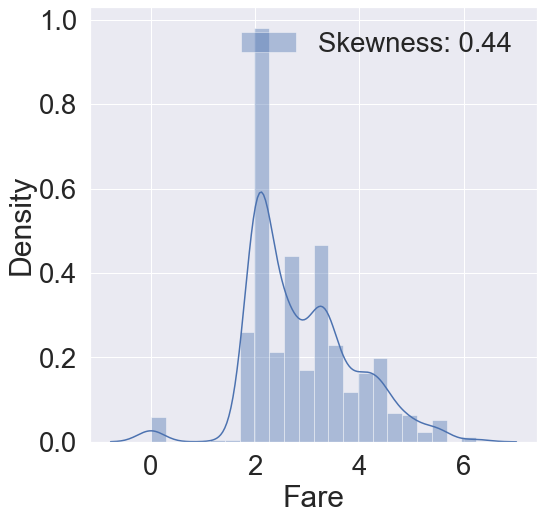

In [148]:
fig, ax = plt.subplots(1, 1, figsize = (8,8))
g = sns.distplot(df_train['Fare'], color ='b', label='Skewness: {:.2f}'.format(df_train['Fare'].skew()),ax=ax)
g = g.legend(loc='best')
# 모델의 성능을 좋게 하기 위해서 Feature Engineering을 거친다.

In [149]:
#2.8 Cabin - NaN이 대략 80%이므로 생존에 영향을 미칠 중요한 정보를 얻기 쉽지 않다. 그러므로 패스.
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamiltySize,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,1.981001,NaN,S,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,4.266662,C85,C,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,2.070022,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.972177,C123,S,2,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,2.085672,NaN,S,1,1


In [152]:
#2.9 Ticket
df_train['Ticket'].value_counts()
#튜토리얼이니 Ticket 역시 패스.

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64